In [54]:
import pandas as pd
ruta = '../data/New_tables/LUNES_VIERNES_C4_C6.xlsx'
hoja_c4_c6 = 'C4_C6'

solucion_actual = pd.read_excel(ruta,sheet_name=hoja_c4_c6)
solucion_actual['HORA LLEGADA ǪUITUMBE'] = pd.to_datetime(solucion_actual['HORA LLEGADA ǪUITUMBE']).dt.strftime('%H:%M')
# Asegurarte de que la columna esté en formato datetime
solucion_actual['TIEMPO EN ANDÉN'] = pd.to_datetime(solucion_actual['TIEMPO EN ANDÉN'])

# Convertir el tiempo a minutos desde la medianoche
solucion_actual['TIEMPO EN ANDÉN (min)'] = solucion_actual['TIEMPO EN ANDÉN'].dt.hour * 60 + solucion_actual['TIEMPO EN ANDÉN'].dt.minute
solucion_actual

solucion_actual['TIEMPO EN ANDÉN'] = pd.to_datetime(solucion_actual['TIEMPO EN ANDÉN']).dt.strftime('%H:%M')
solucion_actual.sort_values(by='TIEMPO EN ANDÉN (min)',ascending=False)

/var/folders/0q/l5j608j10jq82grhg4m4pf0h0000gn/T/ipykernel_33625/2922967573.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  solucion_actual['HORA LLEGADA ǪUITUMBE'] = pd.to_datetime(solucion_actual['HORA LLEGADA ǪUITUMBE']).dt.strftime('%H:%M')
/var/folders/0q/l5j608j10jq82grhg4m4pf0h0000gn/T/ipykernel_33625/2922967573.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  solucion_actual['TIEMPO EN ANDÉN'] = pd.to_datetime(solucion_actual['TIEMPO EN ANDÉN'])


,ORD,ACC.,COD. OP.,CIRCUITO,HORA SALIDA ǪUITUMBE,HORA LLEGADA MAYORISTA,HORA LLEGADA RECREO,HORA LLEGADA STO. DOMINGO,HORA LLEGADA COLÓN,HORA LLEGADA ǪUITUMBE,INTERVALO,TIEMPO EN ANDÉN,TIEMPO EN ANDÉN (min)
201,112,TT,23Ǫ,C6,22:05,22:11,22:22,22:27,22:30,22:55,00:15:00.029000,00:57,57.0
200,111,TT,22Ǫ,C6,21:50,21:56,22:07,22:12,22:15,22:40,00:13:59.981000,00:52,52.0
199,110,TT,21Ǫ,C6,21:36,21:42,21:53,21:58,22:01,22:26,00:13:59.981000,00:46,46.0
173,84,NaN,19Ǫ,C6,17:18,17:24,17:35,17:41,17:44,18:10,00:11:59.971000,00:44,44.0
83,84,TT,9Ǫ,C4,17:32,17:52,18:01,18:13,18:29,19:27,00:09:00,00:44,44.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,4,>>,19Ǫ,C6,05:30,05:36,05:47,05:52,05:55,06:20,00:08:00.038000,NaN,NaN
94,5,>>,20Ǫ,C6,05:38,05:44,05:55,06:00,06:03,06:28,00:08:00.038000,NaN,NaN
95,6,>>,21Ǫ,C6,05:46,05:52,06:03,06:08,06:11,06:36,00:08:00.038000,NaN,NaN
96,7,>>,22Ǫ,C6,05:54,06:00,06:11,06:16,06:19,06:44,00:08:00.038000,NaN,NaN


In [36]:
unidades = solucion_actual[solucion_actual['CIRCUITO']=='C6']['COD. OP.'].unique()
arcos_instancia = {}
for i in range(len(unidades)):
    a = solucion_actual[solucion_actual['COD. OP.']==unidades[i]].sort_values(by='HORA LLEGADA ǪUITUMBE')
    viajes = a['ORD'].to_list()
    tiempoAnden = a['TIEMPO EN ANDÉN (min)'].to_list()
    for j in range(len(viajes)-1):
        arcos_instancia[(viajes[j],viajes[j+1],1)] = tiempoAnden[j+1]
arcos_instancia
        


{(1, 9, 1): 14.0,
 (9, 17, 1): 12.0,
 (17, 25, 1): 38.0,
 (25, 33, 1): 22.0,
 (33, 41, 1): 12.0,
 (41, 49, 1): 12.0,
 (49, 57, 1): 12.0,
 (57, 65, 1): 12.0,
 (65, 73, 1): 12.0,
 (73, 81, 1): 32.0,
 (81, 89, 1): 28.0,
 (89, 97, 1): 14.0,
 (97, 105, 1): 30.0,
 (2, 10, 1): 14.0,
 (10, 18, 1): 12.0,
 (18, 26, 1): 40.0,
 (26, 34, 1): 20.0,
 (34, 42, 1): 12.0,
 (42, 50, 1): 12.0,
 (50, 58, 1): 12.0,
 (58, 66, 1): 12.0,
 (66, 74, 1): 12.0,
 (74, 82, 1): 36.0,
 (82, 90, 1): 24.0,
 (90, 98, 1): 16.0,
 (98, 106, 1): 32.0,
 (3, 11, 1): 14.0,
 (11, 19, 1): 16.0,
 (19, 27, 1): 38.0,
 (27, 35, 1): 18.0,
 (35, 43, 1): 12.0,
 (43, 51, 1): 12.0,
 (51, 59, 1): 12.0,
 (59, 67, 1): 12.0,
 (67, 75, 1): 12.0,
 (75, 83, 1): 40.0,
 (83, 91, 1): 20.0,
 (91, 99, 1): 18.0,
 (99, 107, 1): 34.0,
 (4, 12, 1): 14.0,
 (12, 20, 1): 20.0,
 (20, 28, 1): 36.0,
 (28, 36, 1): 16.0,
 (36, 44, 1): 12.0,
 (44, 52, 1): 12.0,
 (52, 60, 1): 12.0,
 (60, 68, 1): 12.0,
 (68, 76, 1): 12.0,
 (76, 84, 1): 44.0,
 (84, 92, 1): 16.0,
 (9

In [37]:
solucion_actual[solucion_actual['COD. OP.']==unidades[i]].sort_values(by='HORA LLEGADA ǪUITUMBE')

,ORD,ACC.,COD. OP.,CIRCUITO,HORA SALIDA ǪUITUMBE,HORA LLEGADA MAYORISTA,HORA LLEGADA RECREO,HORA LLEGADA STO. DOMINGO,HORA LLEGADA COLÓN,HORA LLEGADA ǪUITUMBE,INTERVALO,TIEMPO EN ANDÉN,TIEMPO EN ANDÉN (min)
97,8,>>,23Ǫ,C6,06:02,06:08,06:19,06:25,06:28,06:54,00:08:00.038000,NaN,NaN
105,16,NaN,23Ǫ,C6,07:06,07:12,07:23,07:29,07:32,07:58,00:08:00.038000,00:12,12.0
113,24,NaN,23Ǫ,C6,08:34,08:40,08:51,08:57,09:00,09:26,00:11:59.971000,00:36,36.0
121,32,NaN,23Ǫ,C6,09:50,09:56,10:07,10:13,10:16,10:42,00:08:00.038000,00:24,24.0
129,40,NaN,23Ǫ,C6,10:54,11:00,11:11,11:17,11:20,11:46,00:08:00.038000,00:12,12.0
137,48,NaN,23Ǫ,C6,11:58,12:04,12:15,12:21,12:24,12:50,00:08:00.038000,00:12,12.0
145,56,TT,23Ǫ,C6,13:02,13:08,13:19,13:25,13:28,13:54,00:08:00.038000,00:12,12.0
153,64,>>,23Ǫ,C6,14:06,14:12,14:23,14:29,14:32,14:58,00:08:00.038000,00:12,12.0
161,72,NaN,23Ǫ,C6,15:10,15:16,15:27,15:33,15:36,16:02,00:08:00.038000,00:12,12.0
169,80,NaN,23Ǫ,C6,16:30,16:36,16:47,16:53,16:56,17:22,00:11:59.971000,00:28,28.0


In [38]:
import pandas as pd
import src.DataProcessing.read_data as rd

ruta = 'Datasets/New_tables/LUNES_VIERNES_C4_C6.xlsx'
hoja_c4_c6 = 'C4_C6'
base = rd.tablas_ordinarios_c4_c6_v2(ruta, hoja_c4_c6)
base[['ORD','COD. OP.','CIRCUITO','HORA_SALIDA','HORA_LLEGADA']]


/Users/luis/Desktop/UNIVERSIDAD/PASANTIA_optimizacion/Researching_Model_Desing/src/DataProcessing/read_data.py:151: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quitumbe_sur_norte['HORA_SALIDA'] = quitumbe_sur_norte['HORA SALIDA ǪUITUMBE'].apply(hora_a_minutos)
/Users/luis/Desktop/UNIVERSIDAD/PASANTIA_optimizacion/Researching_Model_Desing/src/DataProcessing/read_data.py:152: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quitumbe_sur_norte.dropna(subset='ORD',inplace=True)
/Users/luis/Desktop/UNIVERSIDAD/PASANTIA_optimizacion/Researching_Model_Desing/src/DataProc

,ORD,COD. OP.,CIRCUITO,HORA_SALIDA,HORA_LLEGADA
0,1,1Ǫ,C4,300.0,408.0
1,2,2Ǫ,C4,308.0,416.0
2,3,3Ǫ,C4,316.0,424.0
3,4,4Ǫ,C4,324.0,432.0
4,5,5Ǫ,C4,332.0,440.0
...,...,...,...,...,...
197,108,19Ǫ,C6,1268.0,1318.0
198,109,20Ǫ,C6,1282.0,1332.0
199,110,21Ǫ,C6,1296.0,1346.0
200,111,22Ǫ,C6,1310.0,1360.0


In [39]:
import pandas as pd
import src.DataProcessing.read_data as rd

ruta = 'Datasets/TABLAS ORDINARIOS CCTROLEBUS Vs11 20-10-2023-IMPR.xlsx'
hoja_c4_c6 = 'CONSOL C4-C6-L-V'
base = rd.lectura_tablas_c4_c6(ruta,hoja_c4_c6)
base = rd.transformacion_a_minutos(base)
base = base[base['CIRCUITO']=='C6'].reset_index(drop=True).drop("ORD",axis=1).reset_index()
base.columns = ["ORD","COD. OP.","CIRCUITO","SALIDA","LLEGADA"]
base['ORD'] = base['ORD']+1
base.head()


,ORD,COD. OP.,CIRCUITO,SALIDA,LLEGADA
0,1,21Q,C6,306.0,356.0
1,2,22Q,C6,316.0,366.0
2,3,23Q,C6,326.0,376.0
3,4,24Q,C6,336.0,386.0
4,5,25Q,C6,346.0,396.0


In [40]:
base



,ORD,COD. OP.,CIRCUITO,SALIDA,LLEGADA
0,1,21Q,C6,306.0,356.0
1,2,22Q,C6,316.0,366.0
2,3,23Q,C6,326.0,376.0
3,4,24Q,C6,336.0,386.0
4,5,25Q,C6,346.0,396.0
...,...,...,...,...,...
97,98,4Q,C6,1294.0,1344.0
98,99,5Q,C6,1301.0,1351.0
99,100,6Q,C6,1309.0,1359.0
100,101,7Q,C6,1317.0,1367.0


In [42]:
delta = 15 # Parametro de tolerancia
P = 21 # Parametro que indica longitud de pause

# Parametros para controlar tiempito minimo y máximo de espera
l1 = 2
u1 = 20

# Parámetros para controlar tiempo mínimo y máximo de descanso
l2 = P
u2 = P + delta 

# Parametros

break1 = 240
break2 = 670#720
break3 = 960
totalHorasTrabajadas =  1440

M_P = 5
M_T = 1440

b = base['LLEGADA']
b = {key+1:value for key,value in b.to_dict().items()}

a = base['SALIDA']
a = {key+1:value for key,value in a.to_dict().items()}

base = rd.creacion_arcos_A1_A2(base,l1,u1,l2,u2)
base

,ORD,COD. OP.,CIRCUITO,SALIDA,LLEGADA,Arcos-Costo,Arcos-Costo A1,Arcos-Costo A2
0,1,21Q,C6,306.0,356.0,"[(6.0, 0.0), (7.0, 10.0), (8.0, 20.0), (9.0, 3...","[(7.0, 10.0), (8.0, 20.0)]","[(9.0, 30.0)]"
1,2,22Q,C6,316.0,366.0,"[(7.0, 0.0), (8.0, 10.0), (9.0, 20.0), (10.0, ...","[(8.0, 10.0), (9.0, 20.0)]","[(10.0, 30.0)]"
2,3,23Q,C6,326.0,376.0,"[(8.0, 0.0), (9.0, 10.0), (10.0, 20.0), (11.0,...","[(9.0, 10.0), (10.0, 20.0)]","[(11.0, 30.0)]"
3,4,24Q,C6,336.0,386.0,"[(9.0, 0.0), (10.0, 10.0), (11.0, 20.0), (12.0...","[(10.0, 10.0), (11.0, 20.0)]","[(12.0, 30.0)]"
4,5,25Q,C6,346.0,396.0,"[(10.0, 0.0), (11.0, 10.0), (12.0, 20.0), (13....","[(11.0, 10.0), (12.0, 20.0)]","[(13.0, 30.0)]"
...,...,...,...,...,...,...,...,...
97,98,4Q,C6,1294.0,1344.0,[],[],[]
98,99,5Q,C6,1301.0,1351.0,[],[],[]
99,100,6Q,C6,1309.0,1359.0,[],[],[]
100,101,7Q,C6,1317.0,1367.0,[],[],[]


In [43]:
import numpy as np


# Unidades
M = len(base['COD. OP.'].unique()) 

print('M: ',M)
M = 8
capacidad = M

# Viajes 
N = base['ORD'].unique()
print('N: ',len(N))
N0 = np.insert(N, 0, 0)

# Creación del diccionario de costos
costos = {}
costos_A1 = {}
costos_A2 = {}
costos_inicio_fin = {}
for index,row in base.iterrows():
    costos_arcos_A1 = {(row['ORD'],int(i[0])):i[1] for i in row['Arcos-Costo A1']}
    costos_A1.update(costos_arcos_A1)
    
    costos_arcos_A2 = {(row['ORD'],int(i[0])):i[1] for i in row['Arcos-Costo A2']}
    costos_A2.update(costos_arcos_A2)
    
    costos_arcos = {(row['ORD'],int(i[0])):i[1] for i in row['Arcos-Costo']}
    costos.update(costos_arcos)
    
    costos_inicio_fin[(0,row['ORD'])] = 0
    costos_inicio_fin[(row['ORD'],len(N)+1)] = 0
    
costos.update(costos_inicio_fin)

arcos_A1 = costos_A1.keys()
arcos_A2 = costos_A2.keys()
arcos_unidades_A1 = []
arcos_unidades_A2 = []
arcos_unidades_inicio_fin = []

arcos_unidad_i_A1 = [(arco[0],arco[1],1) for arco in arcos_A1 if arco[0]!=0 and arco[1]!=(len(N)+1)]
arcos_unidades_A1 += arcos_unidad_i_A1

arcos_unidad_i_A2 = [(arco[0],arco[1],1) for arco in arcos_A2 if arco[0]!=0 and arco[1]!=(len(N)+1)]
arcos_unidades_A2 += arcos_unidad_i_A2

arcos_unidades_inicio = [(0,row['ORD'],1) for index,row in base.iterrows()]
arcos_unidades_fin = [(row['ORD'],len(N)+1,1) for index,row in base.iterrows()]
arcos_unidades_inicio_fin = arcos_unidades_inicio + arcos_unidades_fin    
    
print('A1',len(arcos_unidades_A1))
print('A2',len(arcos_unidades_A2))
print('Inicio-Fin',len(arcos_unidades_inicio_fin))
print('Inicio',len(arcos_unidades_inicio))
print('Fin',len(arcos_unidades_fin))

arcos = arcos_unidades_A1+arcos_unidades_A2+arcos_unidades_inicio_fin

indices_A1 = list(set([elemento for tupla in arcos_unidades_A1 for elemento in tupla]))

indices_A2 = list(set([elemento for tupla in arcos_unidades_A2 for elemento in tupla]))

M:  14
N:  102
A1 190
A2 126
Inicio-Fin 204
Inicio 102
Fin 102


In [46]:
import gurobipy as gp
from gurobipy import GRB
import matplotlib.pyplot as plt

# Lists to store the evolution of key metrics
gap_list = []
time_list = []
lower_bound_list = []
upper_bound_list = []

# Define the callback function
def my_callback(model, where):
    if where == gp.GRB.Callback.MIP:
        # Check if there's a feasible solution (best objective value exists)
        best_obj = model.cbGet(gp.GRB.Callback.MIP_OBJBST)
        best_bound = model.cbGet(gp.GRB.Callback.MIP_OBJBND)

        if best_obj < gp.GRB.INFINITY:
            # Compute the GAP only if best_obj is valid
            gap = abs(best_obj - best_bound) / (abs(best_obj) + 1e-10)  # Add a small value to avoid division by zero

            # Capture the time during the optimization
            current_time = model.cbGet(gp.GRB.Callback.RUNTIME)

            # Store the values
            gap_list.append(gap)
            lower_bound_list.append(best_bound)
            upper_bound_list.append(best_obj)
            time_list.append(current_time)


# Define and optimize your Gurobi model
model = gp.Model()


m3 = gp.Model('Asignacion-Flota-V1')
# Terminar al alcanzar un Gap del 10%
m3.Params.MIPGap = 0.10
m3.setParam('OutputFlag', 1)
# Enfocar estrategia en mejorar la cota dual
m3.Params.MIPFocus = 3
m3.Params.NoRelHeurTime = 30

# Fijar generación muy agresiva de cortes
m3.Params.Cuts = 1

# Terminar luego de 180 segundos
m3.Params.TimeLimit = 300

x = m3.addVars(arcos,vtype=GRB.BINARY,name='x')
z = m3.addVars(N,vtype=GRB.BINARY,name='z')


T = m3.addVars(N,vtype=GRB.INTEGER,name='T',ub=1440)
PV = m3.addVars(N,vtype=GRB.INTEGER,name='P',lb=0,ub=2)

#T[0].ub = 0
#PV[0].ub = 0

y0 = m3.addVars(N,vtype=GRB.BINARY,name='y1')
y1 = m3.addVars(N,vtype=GRB.BINARY,name='y2')
y2 = m3.addVars(N,vtype=GRB.BINARY,name='y3')


m3.setParam('LogFile', 'gurobi.log')

m3.setObjective(gp.quicksum(costos[i,j]*x[i,j,k] for i,j,k in arcos)+ 1000*z.sum('*') ,GRB.MINIMIZE)

m3.addConstrs((T[j] >= (b[j]-a[j]) - M_T*(1-x[i,j,k]) for i,j,k in arcos_unidades_inicio),name='T_lower_inicio')
m3.addConstrs((T[j] <=  (b[j]-a[j]) + M_T*(1-x[i,j,k]) for i,j,k in arcos_unidades_inicio),name='T_upper_inico ')

m3.addConstrs((PV[j]<= M_P*(1-x[i,j,k]) for i,j,k in arcos_unidades_inicio),name = 'P_upper_inicio')
m3.addConstrs((PV[j]>= - M_P*(1-x[i,j,k]) for i,j,k in arcos_unidades_inicio),name = 'P_lower_inicio')

m3.addConstrs((x.sum(n,'*','*') == 1 - z[n] for n in N), name=f"Constraints")
m3.addConstrs((x.sum('*',i,1)-x.sum(i,'*',1)==0 for i in N ),name=f'Conservacion')
m3.addConstr(x.sum(0,'*',1) <= capacidad, name=f"Capacidades")


m3.addConstrs((T[j] >= T[i] + (b[j]-b[i]) - M_T*(1-x[i,j,k]) for i,j,k in arcos_unidades_A1 ),name='T_upper_A1')
m3.addConstrs((T[j] <= T[i] + (b[j]-b[i]) + M_T*(1-x[i,j,k]) for i,j,k in arcos_unidades_A1 ),name='T_lower_A1')

m3.addConstrs((PV[j] >= PV[i] - M_P*(1-x[i,j,k]) for i,j,k in arcos_unidades_A1 ),name='P_upper_A1')
m3.addConstrs((PV[j] <= PV[i] + M_P*(1-x[i,j,k]) for i,j,k in arcos_unidades_A1 ),name='P_lower_A1')


m3.addConstrs((T[j] >= T[i] + (b[j]-b[i]) - M_T*(1-x[i,j,k]) for i,j,k in arcos_unidades_A2 ),name='T_upper_A2')
m3.addConstrs((T[j] <= T[i] + (b[j]-b[i]) + M_T*(1-x[i,j,k]) for i,j,k in arcos_unidades_A2 ),name='T_lower_A2')

m3.addConstrs((PV[j] >= PV[i] + 1 - M_P*(1-x[i,j,k]) for i,j,k in arcos_unidades_A2 ),name='P_upper_A2')
m3.addConstrs((PV[j] <= PV[i] + 1 + M_P*(1-x[i,j,k]) for i,j,k in arcos_unidades_A2 ),name='P_lower_A2')


m3.addConstrs((T[i]<= break1 - 0.5*P + delta+M_T*(1-y0[i]) for i in N), name = 'N1_Restriccion' )
m3.addConstrs((T[i] - (b[i]-a[i]) >= break1 + 0.5*P - delta-M_T*(1-y1[i]) for i in N), name = 'N2_Restriccion' )
m3.addConstrs((T[i]<= break2 - 0.5*P + delta+M_T*(1-y1[i]) for i in N), name = 'N3_Restriccion' )
m3.addConstrs((T[i] - (b[i]-a[i]) >= break2 + 0.5*P - delta-M_T*(1-y2[i]) for i in N), name = 'N4_Restriccion' )
m3.addConstrs((T[i]<= break3 + M_T*(1-y2[i]) for i in N), name = 'N4_Restriccion' )

m3.addConstrs((y0[n]+y1[n]+y2[n]==1 for n in N ),name='Aux1')
m3.addConstrs((y1[n]+2*y2[n]==PV[n] for n in N ),name='Aux2')


m3.write('Modelo.lp')


m3.optimize(my_callback)

# 16minutos ---> GAP: 72,5% | Cota Inf: 9557 | Best Value: 34711

Set parameter MIPGap to value 0.1
Set parameter MIPFocus to value 3
Set parameter NoRelHeurTime to value 30
Set parameter Cuts to value 1
Set parameter TimeLimit to value 300
Set parameter LogFile to value "gurobi.log"
Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (mac64[arm] - Darwin 22.3.0 22D68)

CPU model: Apple M1 Max
Thread count: 10 physical cores, 10 logical processors, using up to 10 threads

Optimize a model with 2591 rows, 1132 columns and 7698 nonzeros
Model fingerprint: 0x5b60b7d9
Variable types: 0 continuous, 1132 integer (928 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+03]
  Objective range  [2e+00, 1e+03]
  Bounds range     [1e+00, 1e+03]
  RHS range        [1e+00, 2e+03]
Found heuristic solution: objective 102000.00000
Presolve removed 452 rows and 121 columns
Presolve time: 0.02s
Presolved: 2139 rows, 1011 columns, 6842 nonzeros
Variable types: 0 continuous, 1011 integer (807 binary)
Found heuristic solution: objective 94000.000000
Starting NoRel 

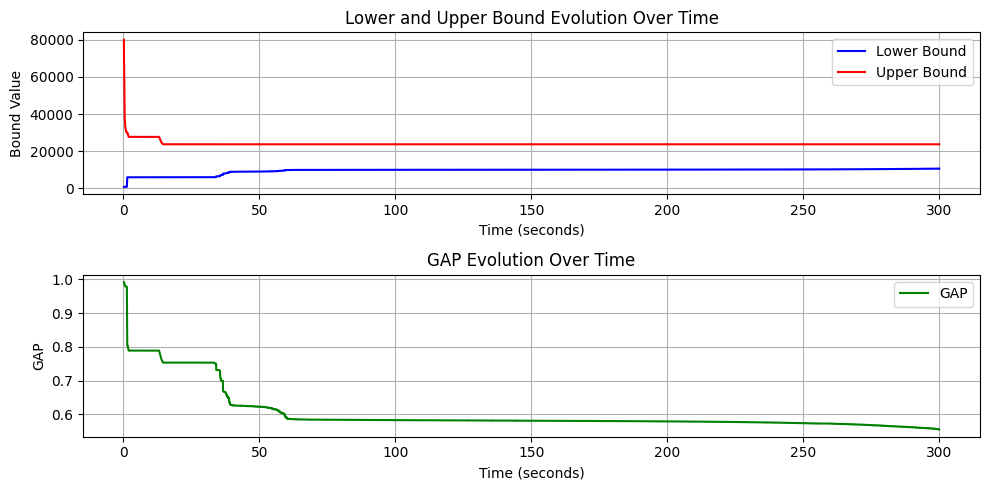

In [47]:
# Plot the results in two subplots within the same figure
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 5))  # 2 rows, 1 column

# Plot 1: Lower and Upper Bound
ax1.plot(time_list[5:], lower_bound_list[5:], label='Lower Bound', color='blue')
ax1.plot(time_list[5:], upper_bound_list[5:], label='Upper Bound', color='red')
ax1.set_xlabel('Time (seconds)')
ax1.set_ylabel('Bound Value')
ax1.set_title('Lower and Upper Bound Evolution Over Time')
ax1.legend()
ax1.grid(True)

# Plot 2: GAP
ax2.plot(time_list[5:], gap_list[5:], label='GAP', color='green')
ax2.set_xlabel('Time (seconds)')
ax2.set_ylabel('GAP')
ax2.set_title('GAP Evolution Over Time')
ax2.legend()
ax2.grid(True)

# Show the plots
plt.tight_layout()  # Adjusts spacing between plots
plt.show()

In [48]:
def generar_sublistas(tuplas,tuplas_iniciales):
    sublistas = []
    while tuplas_iniciales:
        sublista = []
        actual = tuplas_iniciales.pop(0)
        sublista.append(actual)
        
        # Buscar conexiones hacia adelante
        while True:
            found = False
            for i, t in enumerate(tuplas):
                if t[0] == actual[1]:
                    sublista.append(t)
                    actual = t
                    tuplas.pop(i)
                    found = True
                    break
            if not found:
                break
        
        sublistas.append(sublista)
    
    return sublistas


def hora_a_minutos(n):
    hora = str(n).split(':')
    if len(hora) == 3:
        return float(hora[0])*60 + float(hora[1])+ float(hora[2])/100
    if len(hora) == 2:
        return float(hora[0])*60 + float(hora[1])



vx = m3.getAttr('x', x)
solucion = {}
tuplas = []
tuplas_iniciales = []
contador = 1
for tupla,valor in vx.items():
    if valor >= 0.95 :
        tuplas.append(tupla)
    if valor >= 0.95 and tupla[0]==0:
        tuplas_iniciales.append(tupla)
        
resultados = generar_sublistas(tuplas,tuplas_iniciales)

for i in resultados:
    if len(i)>1:
        solucion[contador] = {0:0}
        
        solucion[contador][0]= i[0][0]
        for k in i:
            solucion[contador][k[0]]= k[1]
        contador +=1
        
print("---------------------- SOLUCION ----------------------")
print(solucion)

asignacion = pd.DataFrame()
for k in range(1,M+1):   
    nodo = 0    
    ord = []
    tiempo_anden = []
    while nodo != len(N)+1:
        tiempo_anden.append(costos[nodo,solucion[k][nodo]])
        ord.append(solucion[k][nodo])
        nodo = solucion[k][nodo]
    
    a = base[list(base.columns[0:1]) + list(base.columns[3:5]) + list(base.columns[9:10])]
    a = a[a['ORD'].isin(ord)].reset_index(drop=True)
    a['Tiempo en anden'] = pd.Series(tiempo_anden)
    a['UNIDAD ASIGNADA'] = k
    
    asignacion = pd.concat([asignacion,a])
asignacion = asignacion.sort_values(by='SALIDA')
print('---------------------- ASIGNACION FINAL ----------------------')
print(asignacion.head(10).to_markdown(index=False),'\n')


---------------------- SOLUCION ----------------------
{1: {0: 1, 1: 7, 7: 13, 13: 17, 17: 22, 22: 27, 27: 33, 33: 39, 39: 45, 45: 51, 51: 56, 56: 61, 61: 66, 66: 72, 72: 79, 79: 103}, 2: {0: 2, 2: 8, 8: 14, 14: 18, 18: 23, 23: 29, 29: 35, 35: 41, 41: 47, 47: 53, 53: 57, 57: 103}, 3: {0: 4, 4: 10, 10: 15, 15: 19, 19: 25, 25: 31, 31: 103}, 4: {0: 5, 5: 11, 11: 16, 16: 20, 20: 26, 26: 32, 32: 38, 38: 44, 44: 50, 50: 103}, 5: {0: 34, 34: 40, 40: 46, 46: 52, 52: 58, 58: 62, 62: 67, 67: 73, 73: 81, 81: 89, 89: 97, 97: 103}, 6: {0: 36, 36: 42, 42: 48, 48: 54, 54: 59, 59: 63, 63: 69, 69: 75, 75: 83, 83: 91, 91: 99, 99: 103}, 7: {0: 37, 37: 43, 43: 49, 49: 55, 55: 60, 60: 64, 64: 70, 70: 76, 76: 84, 84: 92, 92: 100, 100: 103}, 8: {0: 68, 68: 74, 74: 82, 82: 90, 90: 101, 101: 103}}
---------------------- ASIGNACION FINAL ----------------------
|   ORD |   SALIDA |   LLEGADA |   Tiempo en anden |   UNIDAD ASIGNADA |
|------:|---------:|----------:|------------------:|------------------:|
|     1

In [12]:
unidad = 1

print(f'---------------------- ASIGNACION UNIDAD {unidad} ----------------------')

resultado_individual = asignacion[asignacion['UNIDAD ASIGNADA']==unidad]
print(resultado_individual.to_markdown(index=False),'\n')

vT = m3.getAttr('x', T)
vPV = m3.getAttr('x',PV)
vY0 = m3.getAttr('x',y0)
vY1 = m3.getAttr('x',y1)
vY2 = m3.getAttr('x',y2)

solucion = {}
tuplas = []
contador = 1

print(f'---------------------- VARIABLES MODELO ----------------------')

for i in resultado_individual['ORD'].to_list():
    print(f"Nodo {i}, T: {vT[i]}, P: {vPV[i]}, y0: {vY0[i]}, y1: {vY1[i]}, y2: {vY2[i]}")

---------------------- ASIGNACION UNIDAD 1 ----------------------
|   ORD |   SALIDA |   LLEGADA |   Tiempo en anden |   UNIDAD ASIGNADA |
|------:|---------:|----------:|------------------:|------------------:|
|     1 |      306 |       356 |                 0 |                 1 |
|     7 |      366 |       418 |                10 |                 1 |
|    13 |      426 |       478 |                 8 |                 1 |
|    21 |      541 |       593 |                63 |                 1 |
|    26 |      601 |       653 |                 8 |                 1 |
|    32 |      661 |       713 |                 8 |                 1 | 

---------------------- VARIABLES MODELO ----------------------
Nodo 1, T: 50.0, P: 0.0, y0: 1.0, y1: 0.0, y2: 0.0
Nodo 7, T: 112.0, P: 0.0, y0: 1.0, y1: 0.0, y2: 0.0
Nodo 13, T: 172.0, P: 0.0, y0: 1.0, y1: 0.0, y2: 0.0
Nodo 21, T: 287.0, P: 1.0, y0: 0.0, y1: 1.0, y2: 0.0
Nodo 26, T: 347.0, P: 1.0, y0: 0.0, y1: 1.0, y2: 0.0
Nodo 32, T: 407.0, P: 1

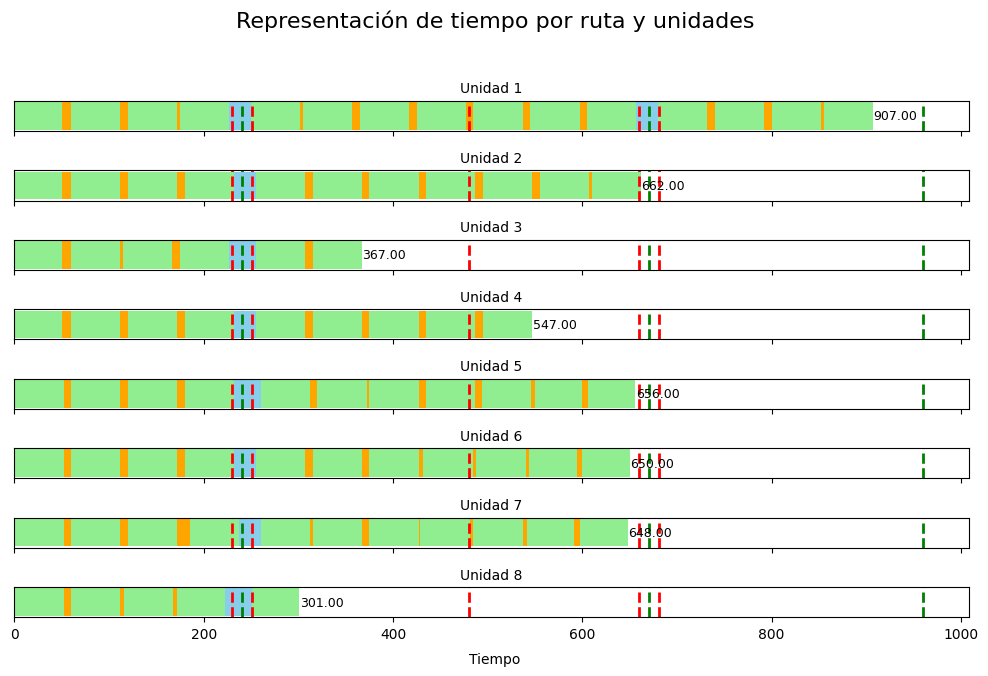

In [50]:
import matplotlib.pyplot as plt

asignacion['TIEMPO_VIAJE'] = asignacion['LLEGADA'] - asignacion['SALIDA']

# Valor umbral para cambiar de color
valor_umbral = u1

# Obtener las unidades únicas
unidades = asignacion['UNIDAD ASIGNADA'].unique()

# Crear un subgráfico por cada unidad
fig, axs = plt.subplots(len(unidades), 1, figsize=(10, len(unidades)*1/1.15), sharex=True)  # Ajustar el tamaño del gráfico

# Valores para las líneas verticales

lineas_verticales_exacto = [break1,break2,break3]
lineas_verticales = [break1-P/2, break1+P/2, 480, break2-P/2, break2+P/2]

for i, unidad in enumerate(unidades):
    asignacion_unidad = asignacion[asignacion['UNIDAD ASIGNADA'] == unidad]
    
    Type = []
    Time = []
    Colors = []
    for j, row in asignacion_unidad.iterrows():
        if not np.isnan(row['Tiempo en anden']):
            Type.append('A1')
            Time.append(row['Tiempo en anden'])
            # Asignar color según el valor del tiempo en andén
            if row['Tiempo en anden'] <= valor_umbral:
                Colors.append('orange')
            else:
                Colors.append('skyblue')
        Type.append('A2')
        Time.append(row['TIEMPO_VIAJE'])
        Colors.append('lightgreen')  # Color fijo para A2
    
    data = pd.DataFrame({
        "Type": Type,
        "Time": Time,
        "Colors": Colors
    })
    
    left = 0
    bar_height = 0.3  # Ajustar el ancho de las barras
    for idx, row in data.iterrows():
        axs[i].barh(y=0, width=row['Time'], left=left, color=row['Colors'], height=bar_height)
        left += row['Time']
    
    # Añadir el texto al final de la barra
    total_time = left  # La longitud total de la barra es 'left' después del bucle
    axs[i].text(left + 0.5, 0, f'{total_time:.2f}', va='center', fontsize=9)  # Ajusta 0.5 para dar espacio al texto
    
    axs[i].set_yticks([])
    axs[i].set_title(f'Unidad {unidad}', fontsize=10)

    # Añadir líneas verticales rojas en los valores especificados
    for x_value in lineas_verticales:
        axs[i].axvline(x=x_value, color='red', linestyle='--', linewidth=2)
    for x_value in lineas_verticales_exacto:
        axs[i].axvline(x=x_value, color='green', linestyle='--', linewidth=2)

# Etiquetas comunes
fig.text(0.5, 0.04, 'Tiempo', ha='center')
fig.suptitle('Representación de tiempo por ruta y unidades', fontsize=16)

plt.tight_layout(rect=[0, 0.05, 1, 0.95])
plt.show() 

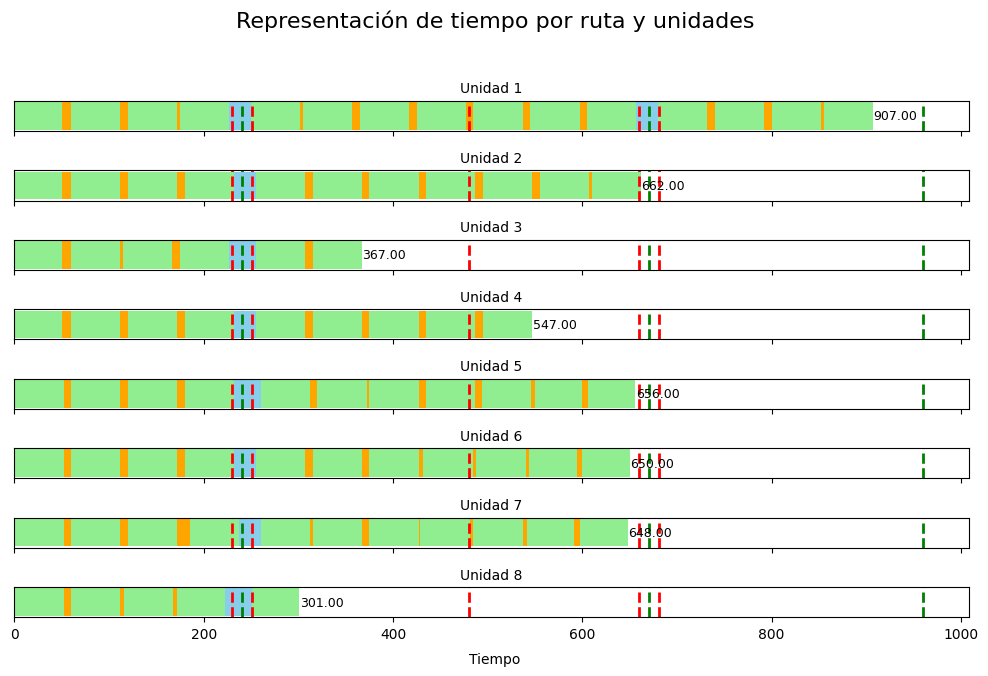

In [ ]:
import matplotlib.pyplot as plt

asignacion['TIEMPO_VIAJE'] = asignacion['LLEGADA'] - asignacion['SALIDA']

# Valor umbral para cambiar de color
valor_umbral = u1

# Obtener las unidades únicas
unidades = asignacion['UNIDAD ASIGNADA'].unique()

# Crear un subgráfico por cada unidad
fig, axs = plt.subplots(len(unidades), 1, figsize=(10, len(unidades)*1/1.15), sharex=True)  # Ajustar el tamaño del gráfico

# Valores para las líneas verticales

lineas_verticales_exacto = [break1,break2,break3]
lineas_verticales = [break1-P/2, break1+P/2, 480, break2-P/2, break2+P/2]

for i, unidad in enumerate(unidades):
    asignacion_unidad = asignacion[asignacion['UNIDAD ASIGNADA'] == unidad]
    
    Type = []
    Time = []
    Colors = []
    for j, row in asignacion_unidad.iterrows():
        if not np.isnan(row['Tiempo en anden']):
            Type.append('A1')
            Time.append(row['Tiempo en anden'])
            # Asignar color según el valor del tiempo en andén
            if row['Tiempo en anden'] <= valor_umbral:
                Colors.append('orange')
            else:
                Colors.append('skyblue')
        Type.append('A2')
        Time.append(row['TIEMPO_VIAJE'])
        Colors.append('lightgreen')  # Color fijo para A2
    
    data = pd.DataFrame({
        "Type": Type,
        "Time": Time,
        "Colors": Colors
    })
    
    left = 0
    bar_height = 0.3  # Ajustar el ancho de las barras
    for idx, row in data.iterrows():
        axs[i].barh(y=0, width=row['Time'], left=left, color=row['Colors'], height=bar_height)
        left += row['Time']
    
    # Añadir el texto al final de la barra
    total_time = left  # La longitud total de la barra es 'left' después del bucle
    axs[i].text(left + 0.5, 0, f'{total_time:.2f}', va='center', fontsize=9)  # Ajusta 0.5 para dar espacio al texto
    
    axs[i].set_yticks([])
    axs[i].set_title(f'Unidad {unidad}', fontsize=10)

    # Añadir líneas verticales rojas en los valores especificados
    for x_value in lineas_verticales:
        axs[i].axvline(x=x_value, color='red', linestyle='--', linewidth=2)
    for x_value in lineas_verticales_exacto:
        axs[i].axvline(x=x_value, color='green', linestyle='--', linewidth=2)

# Etiquetas comunes
fig.text(0.5, 0.04, 'Tiempo', ha='center')
fig.suptitle('Representación de tiempo por ruta y unidades', fontsize=16)

plt.tight_layout(rect=[0, 0.05, 1, 0.95])
plt.show() 

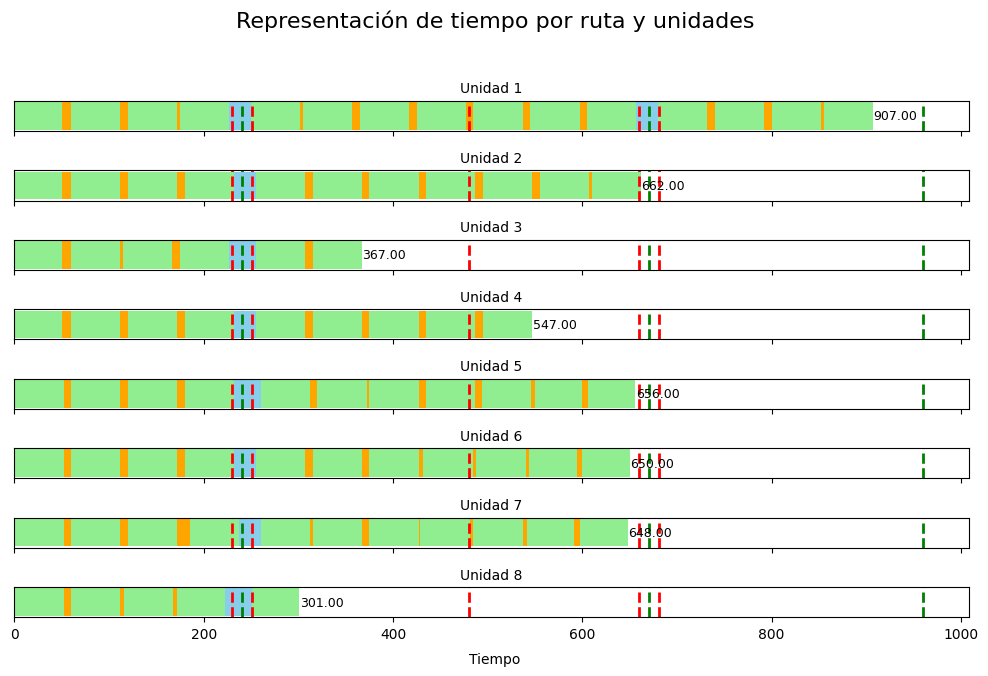

In [ ]:
import matplotlib.pyplot as plt

asignacion['TIEMPO_VIAJE'] = asignacion['LLEGADA'] - asignacion['SALIDA']

# Valor umbral para cambiar de color
valor_umbral = u1

# Obtener las unidades únicas
unidades = asignacion['UNIDAD ASIGNADA'].unique()

# Crear un subgráfico por cada unidad
fig, axs = plt.subplots(len(unidades), 1, figsize=(10, len(unidades)*1/1.15), sharex=True)  # Ajustar el tamaño del gráfico

# Valores para las líneas verticales

lineas_verticales_exacto = [break1,break2,break3]
lineas_verticales = [break1-P/2, break1+P/2, 480, break2-P/2, break2+P/2]

for i, unidad in enumerate(unidades):
    asignacion_unidad = asignacion[asignacion['UNIDAD ASIGNADA'] == unidad]
    
    Type = []
    Time = []
    Colors = []
    for j, row in asignacion_unidad.iterrows():
        if not np.isnan(row['Tiempo en anden']):
            Type.append('A1')
            Time.append(row['Tiempo en anden'])
            # Asignar color según el valor del tiempo en andén
            if row['Tiempo en anden'] <= valor_umbral:
                Colors.append('orange')
            else:
                Colors.append('skyblue')
        Type.append('A2')
        Time.append(row['TIEMPO_VIAJE'])
        Colors.append('lightgreen')  # Color fijo para A2
    
    data = pd.DataFrame({
        "Type": Type,
        "Time": Time,
        "Colors": Colors
    })
    
    left = 0
    bar_height = 0.3  # Ajustar el ancho de las barras
    for idx, row in data.iterrows():
        axs[i].barh(y=0, width=row['Time'], left=left, color=row['Colors'], height=bar_height)
        left += row['Time']
    
    # Añadir el texto al final de la barra
    total_time = left  # La longitud total de la barra es 'left' después del bucle
    axs[i].text(left + 0.5, 0, f'{total_time:.2f}', va='center', fontsize=9)  # Ajusta 0.5 para dar espacio al texto
    
    axs[i].set_yticks([])
    axs[i].set_title(f'Unidad {unidad}', fontsize=10)

    # Añadir líneas verticales rojas en los valores especificados
    for x_value in lineas_verticales:
        axs[i].axvline(x=x_value, color='red', linestyle='--', linewidth=2)
    for x_value in lineas_verticales_exacto:
        axs[i].axvline(x=x_value, color='green', linestyle='--', linewidth=2)

# Etiquetas comunes
fig.text(0.5, 0.04, 'Tiempo', ha='center')
fig.suptitle('Representación de tiempo por ruta y unidades', fontsize=16)

plt.tight_layout(rect=[0, 0.05, 1, 0.95])
plt.show() 

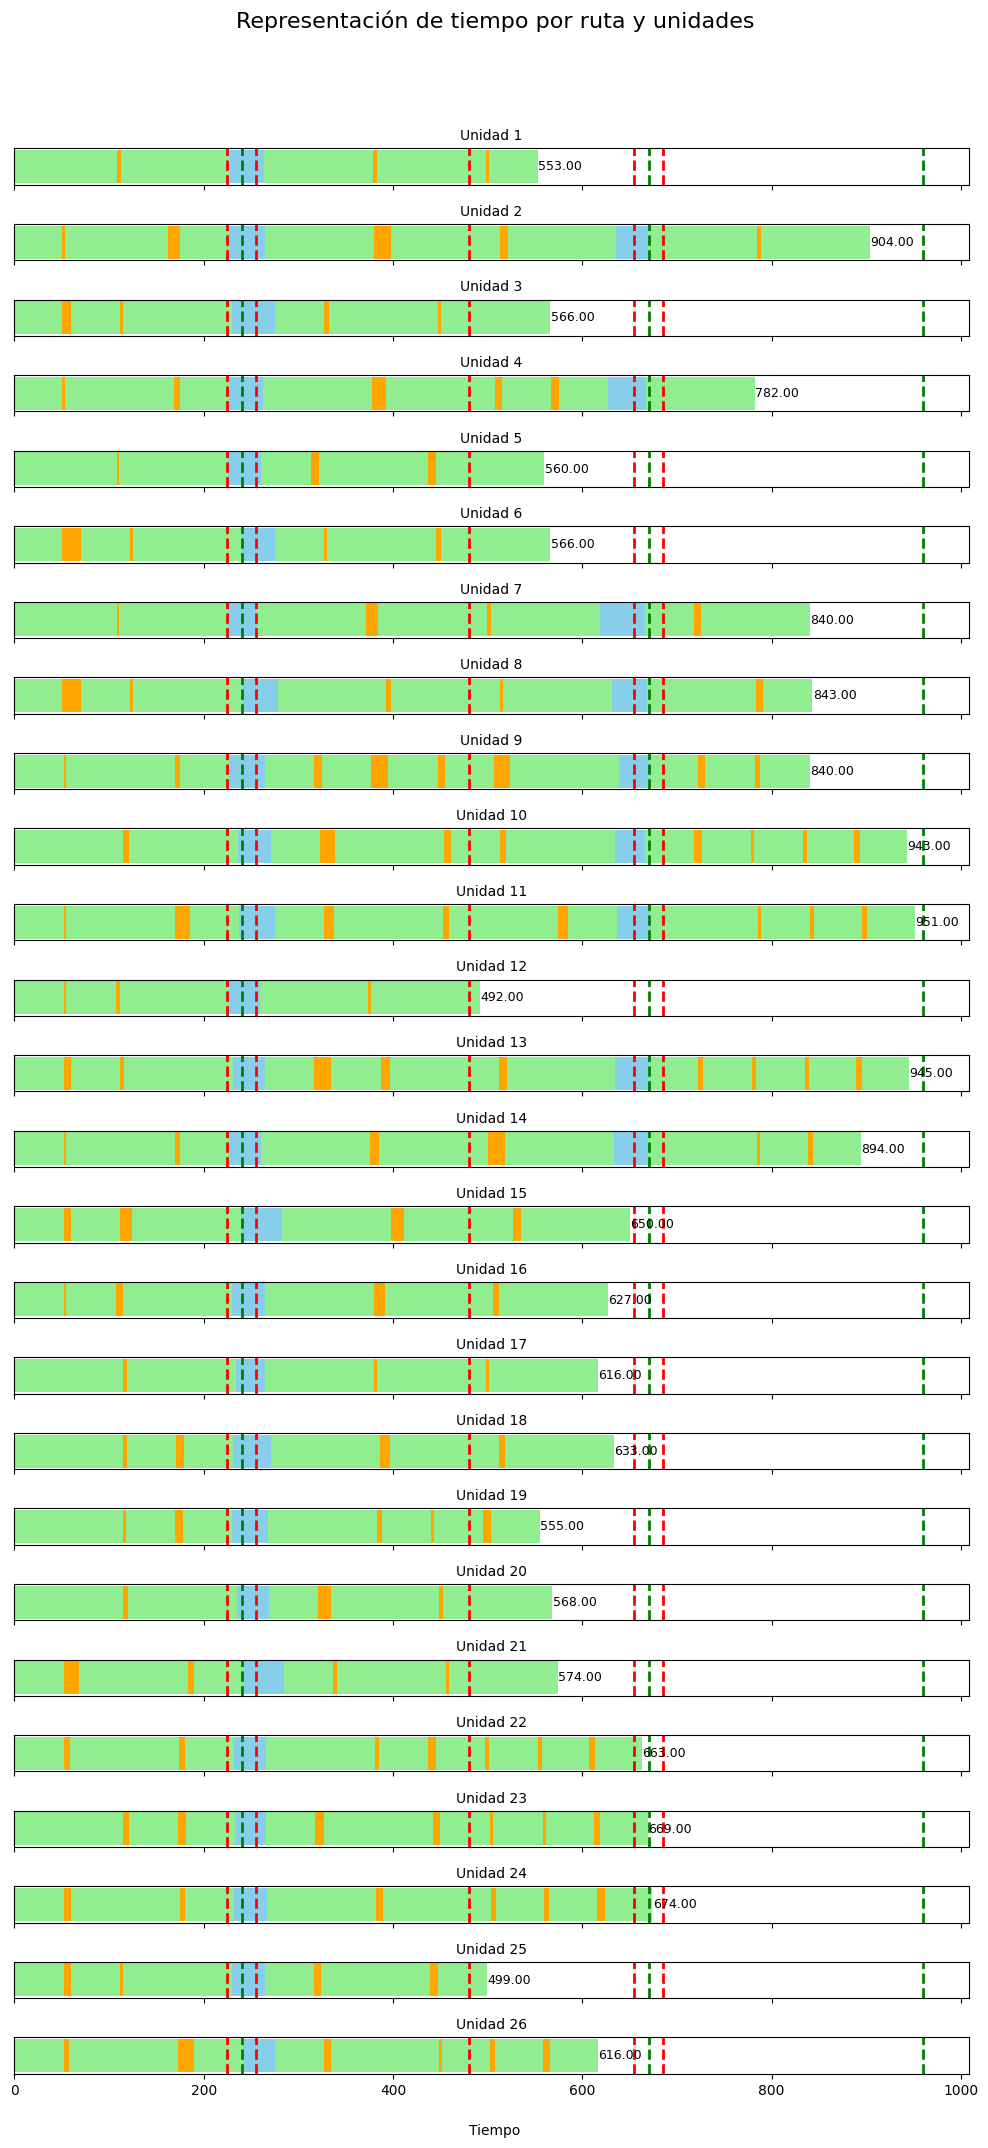

In [88]:
import matplotlib.pyplot as plt

asignacion['TIEMPO_VIAJE'] = asignacion['LLEGADA'] - asignacion['SALIDA']

# Valor umbral para cambiar de color
valor_umbral = u1

# Obtener las unidades únicas
unidades = asignacion['UNIDAD ASIGNADA'].unique()

# Crear un subgráfico por cada unidad
fig, axs = plt.subplots(len(unidades), 1, figsize=(10, len(unidades)*1/1.15), sharex=True)  # Ajustar el tamaño del gráfico

# Valores para las líneas verticales

lineas_verticales_exacto = [break1,break2,break3]
lineas_verticales = [break1-P/2, break1+P/2, 480, break2-P/2, break2+P/2]

for i, unidad in enumerate(unidades):
    asignacion_unidad = asignacion[asignacion['UNIDAD ASIGNADA'] == unidad]
    
    Type = []
    Time = []
    Colors = []
    for j, row in asignacion_unidad.iterrows():
        if not np.isnan(row['Tiempo en anden']):
            Type.append('A1')
            Time.append(row['Tiempo en anden'])
            # Asignar color según el valor del tiempo en andén
            if row['Tiempo en anden'] <= valor_umbral:
                Colors.append('orange')
            else:
                Colors.append('skyblue')
        Type.append('A2')
        Time.append(row['TIEMPO_VIAJE'])
        Colors.append('lightgreen')  # Color fijo para A2
    
    data = pd.DataFrame({
        "Type": Type,
        "Time": Time,
        "Colors": Colors
    })
    
    left = 0
    bar_height = 0.3  # Ajustar el ancho de las barras
    for idx, row in data.iterrows():
        axs[i].barh(y=0, width=row['Time'], left=left, color=row['Colors'], height=bar_height)
        left += row['Time']
    
    # Añadir el texto al final de la barra
    total_time = left  # La longitud total de la barra es 'left' después del bucle
    axs[i].text(left + 0.5, 0, f'{total_time:.2f}', va='center', fontsize=9)  # Ajusta 0.5 para dar espacio al texto
    
    axs[i].set_yticks([])
    axs[i].set_title(f'Unidad {unidad}', fontsize=10)

    # Añadir líneas verticales rojas en los valores especificados
    for x_value in lineas_verticales:
        axs[i].axvline(x=x_value, color='red', linestyle='--', linewidth=2)
    for x_value in lineas_verticales_exacto:
        axs[i].axvline(x=x_value, color='green', linestyle='--', linewidth=2)

# Etiquetas comunes
fig.text(0.5, 0.04, 'Tiempo', ha='center')
fig.suptitle('Representación de tiempo por ruta y unidades', fontsize=16)

plt.tight_layout(rect=[0, 0.05, 1, 0.95])
plt.show() 

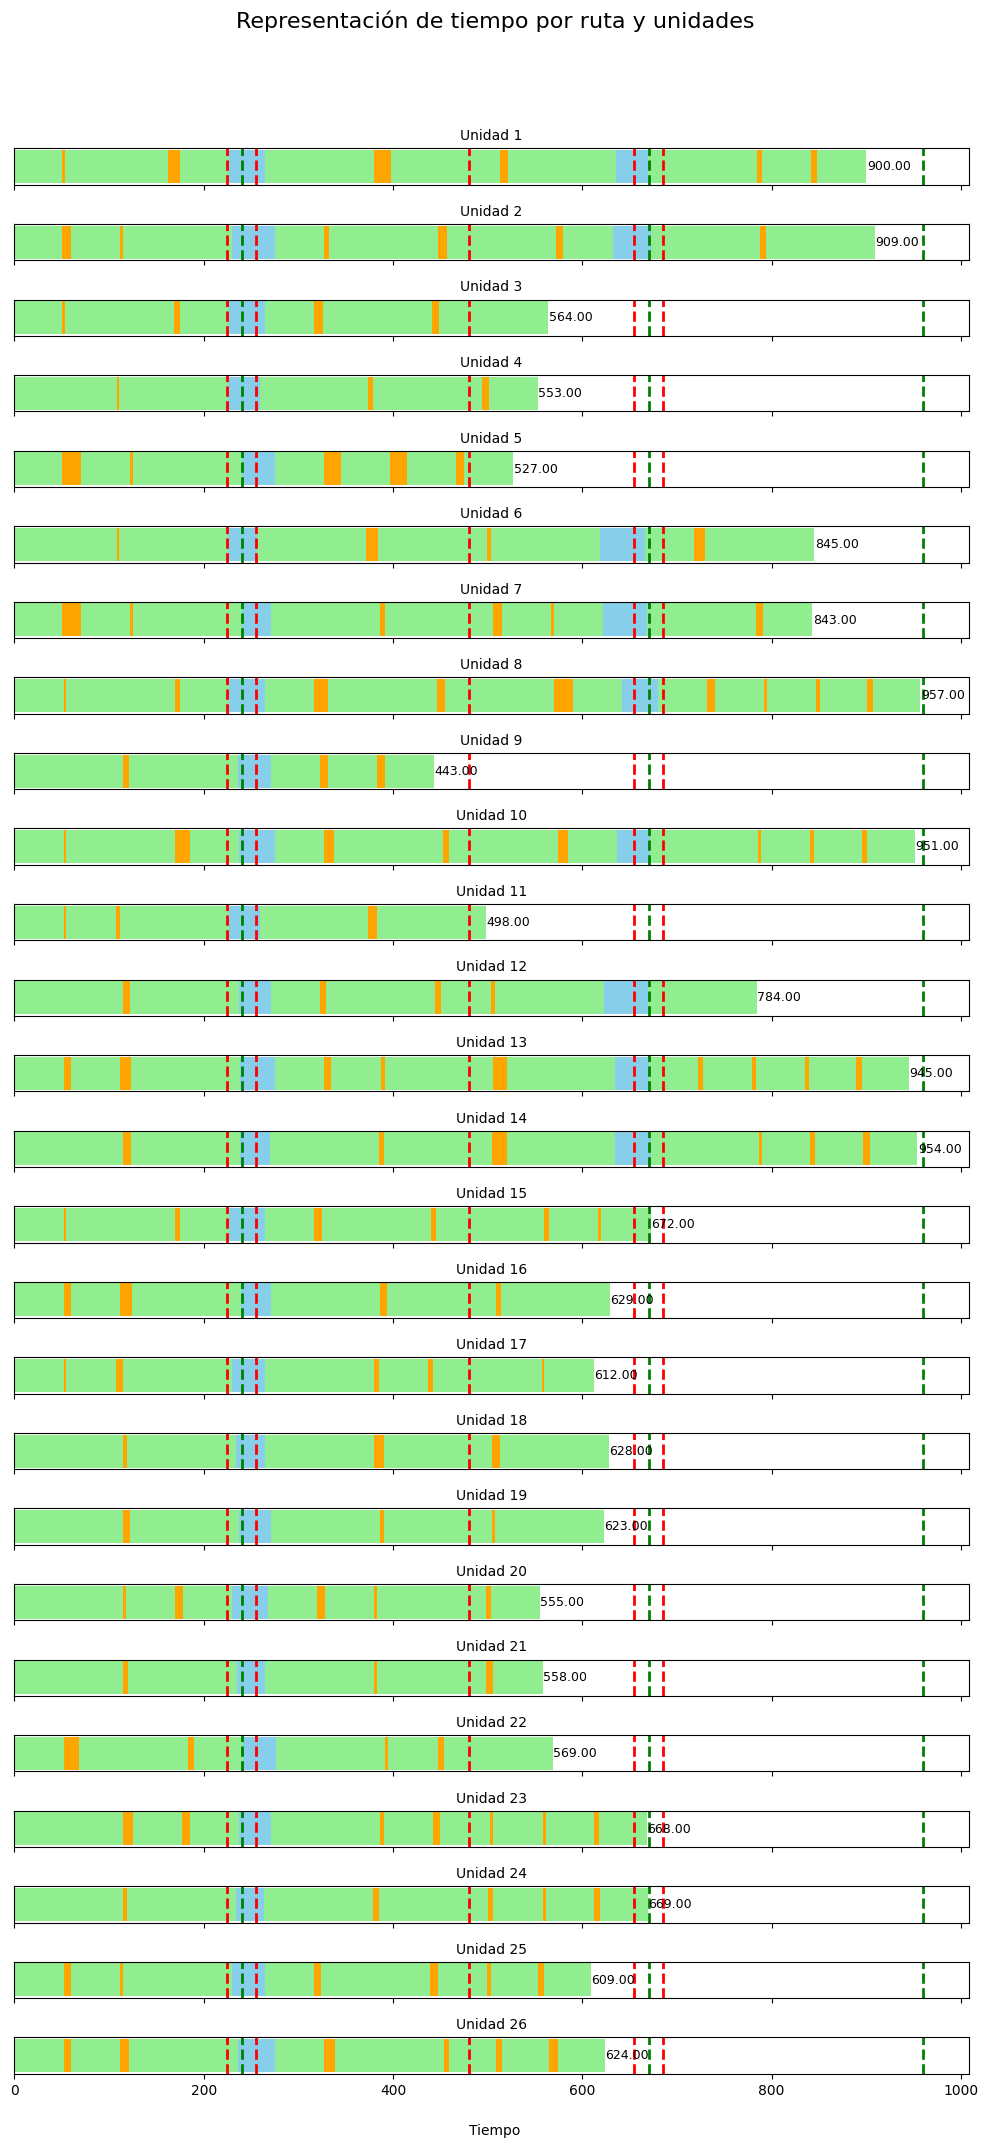

In [39]:
import matplotlib.pyplot as plt

asignacion['TIEMPO_VIAJE'] = asignacion['LLEGADA'] - asignacion['SALIDA']

# Valor umbral para cambiar de color
valor_umbral = u1

# Obtener las unidades únicas
unidades = asignacion['UNIDAD ASIGNADA'].unique()

# Crear un subgráfico por cada unidad
fig, axs = plt.subplots(len(unidades), 1, figsize=(10, len(unidades)*1/1.15), sharex=True)  # Ajustar el tamaño del gráfico

# Valores para las líneas verticales

lineas_verticales_exacto = [break1,break2,break3]
lineas_verticales = [break1-P/2, break1+P/2, 480, break2-P/2, break2+P/2]

for i, unidad in enumerate(unidades):
    asignacion_unidad = asignacion[asignacion['UNIDAD ASIGNADA'] == unidad]
    
    Type = []
    Time = []
    Colors = []
    for j, row in asignacion_unidad.iterrows():
        if not np.isnan(row['Tiempo en anden']):
            Type.append('A1')
            Time.append(row['Tiempo en anden'])
            # Asignar color según el valor del tiempo en andén
            if row['Tiempo en anden'] <= valor_umbral:
                Colors.append('orange')
            else:
                Colors.append('skyblue')
        Type.append('A2')
        Time.append(row['TIEMPO_VIAJE'])
        Colors.append('lightgreen')  # Color fijo para A2
    
    data = pd.DataFrame({
        "Type": Type,
        "Time": Time,
        "Colors": Colors
    })
    
    left = 0
    bar_height = 0.3  # Ajustar el ancho de las barras
    for idx, row in data.iterrows():
        axs[i].barh(y=0, width=row['Time'], left=left, color=row['Colors'], height=bar_height)
        left += row['Time']
    
    # Añadir el texto al final de la barra
    total_time = left  # La longitud total de la barra es 'left' después del bucle
    axs[i].text(left + 0.5, 0, f'{total_time:.2f}', va='center', fontsize=9)  # Ajusta 0.5 para dar espacio al texto
    
    axs[i].set_yticks([])
    axs[i].set_title(f'Unidad {unidad}', fontsize=10)

    # Añadir líneas verticales rojas en los valores especificados
    for x_value in lineas_verticales:
        axs[i].axvline(x=x_value, color='red', linestyle='--', linewidth=2)
    for x_value in lineas_verticales_exacto:
        axs[i].axvline(x=x_value, color='green', linestyle='--', linewidth=2)

# Etiquetas comunes
fig.text(0.5, 0.04, 'Tiempo', ha='center')
fig.suptitle('Representación de tiempo por ruta y unidades', fontsize=16)

plt.tight_layout(rect=[0, 0.05, 1, 0.95])
plt.show()